In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import  matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("archive/yield_df.csv")

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Dropping the unnessary Data


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


##### checking for null values

In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.shape

(28242, 7)

##### checking for duplicates

In [8]:
df.duplicated().sum()

2310

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(25932, 7)

##### Checking datatype

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


### Graph Frequency VS Area

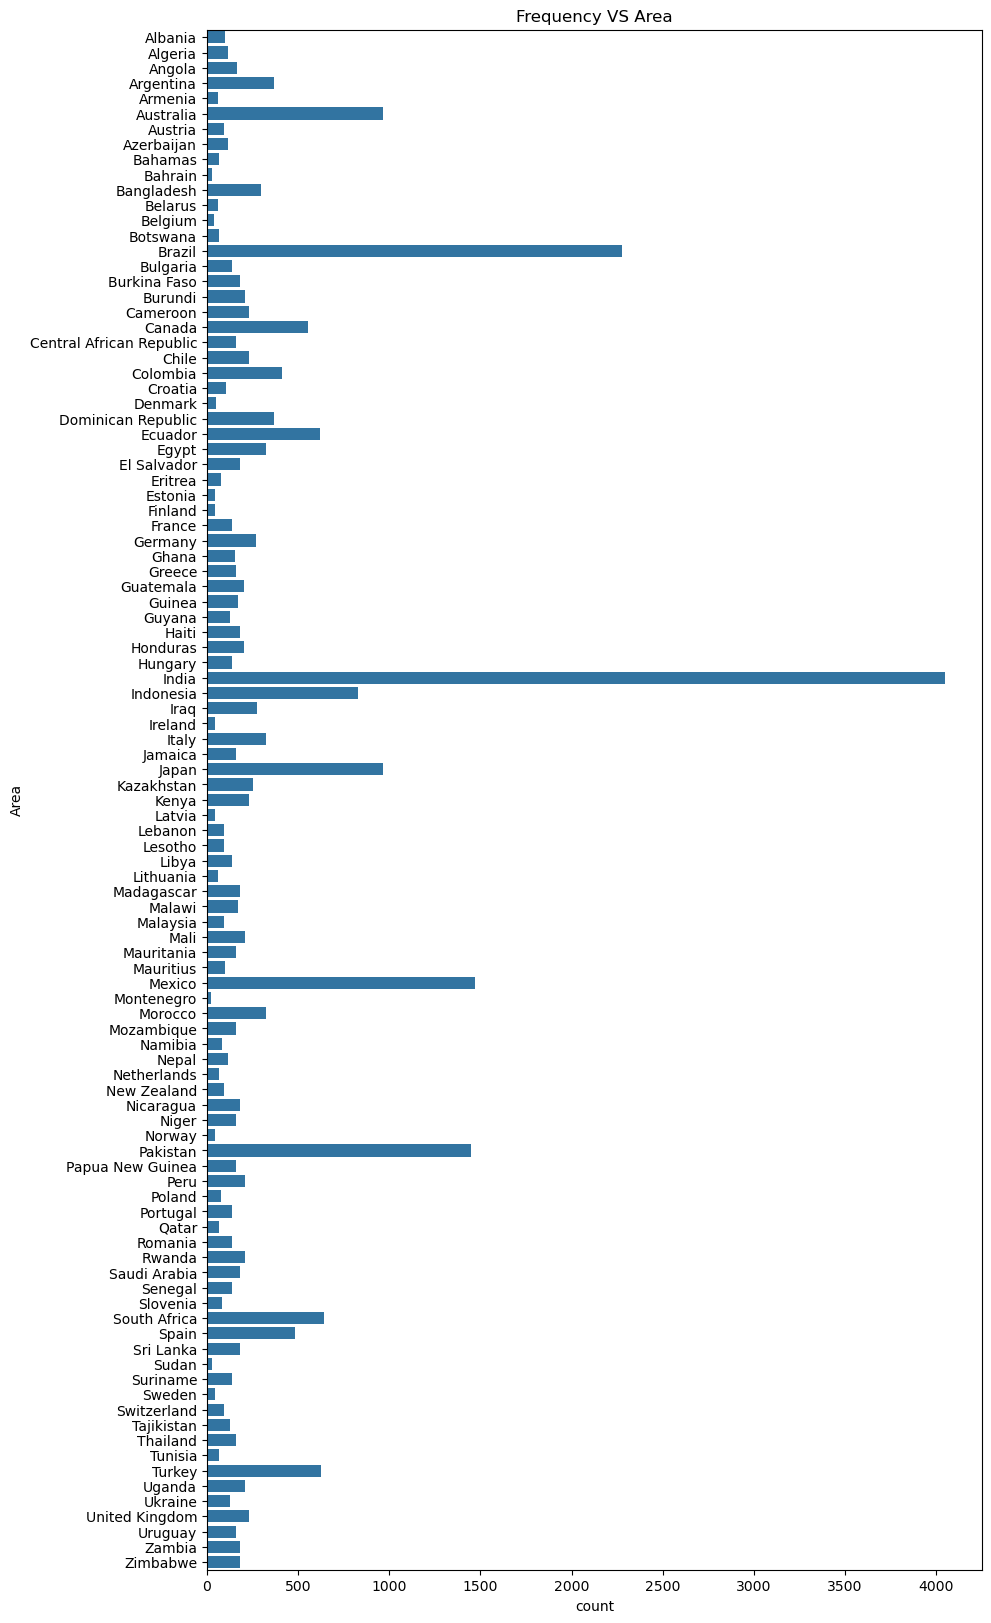

In [5]:
plt.figure(figsize = (10 , 20))
sns.countplot(df['Area'])
plt.title('Frequency VS Area')
plt.show()

### Yield Vs Country

In [6]:
yield_per_country = df.groupby('Area')['hg/ha_yield'].sum().reset_index()
print(yield_per_country)

               Area  hg/ha_yield
0           Albania      5711536
1           Algeria      6711464
2            Angola      5722563
3         Argentina     32864032
4           Armenia      4524100
..              ...          ...
96          Ukraine      5496901
97   United Kingdom     55419990
98          Uruguay      9539820
99           Zambia      7254311
100        Zimbabwe      7408629

[101 rows x 2 columns]


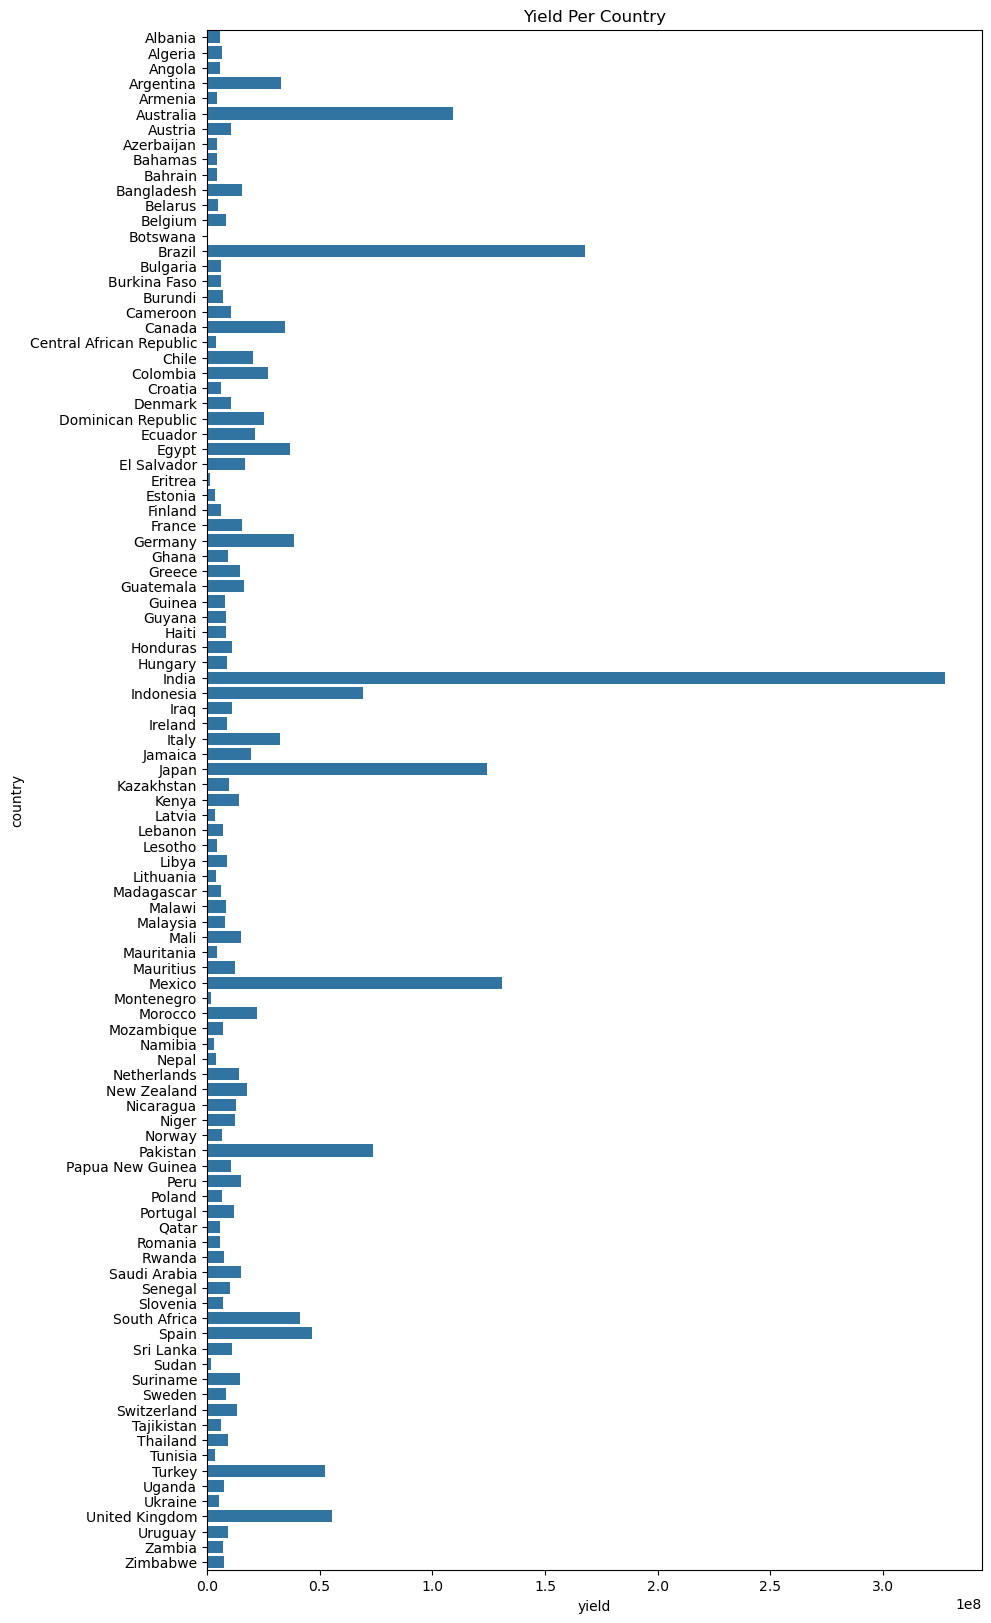

In [7]:
plt.figure(figsize=(10,20))
sns.barplot(data = yield_per_country, y = 'Area', x = 'hg/ha_yield')
plt.title('Yield Per Country')
plt.xlabel('yield')
plt.ylabel('country')
plt.show()

### Frequency Vs Crop

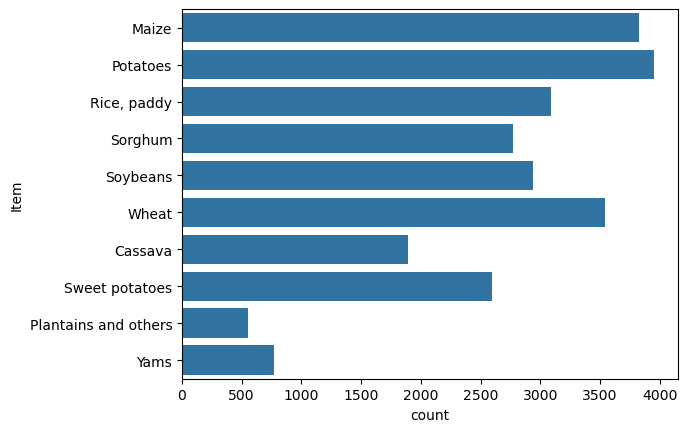

In [16]:
sns.countplot(df['Item'])
plt.show()

### Spliting the data

In [17]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [18]:
df = df[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]

In [19]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Splitting the data into train data = 60% , cross Validation data = 20%, and test data = 20%


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp , y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)
del X_temp , y_temp

saving the data in parquet

In [22]:
import os

# Create a folder called 'data_splits'
os.makedirs('data_splits', exist_ok=True)

# Save each X and y as Parquet inside this folder
X_train.to_parquet('data_splits/X_train.parquet')
y_train.to_frame(name='target').to_parquet('data_splits/y_train.parquet')

X_cv.to_parquet('data_splits/X_cv.parquet')
y_cv.to_frame(name='target').to_parquet('data_splits/y_cv.parquet')

X_test.to_parquet('data_splits/X_test.parquet')
y_test.to_frame(name='target').to_parquet('data_splits/y_test.parquet')

### Encoding and Scaling data

In [23]:
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as scale
from sklearn.compose import ColumnTransformer as ct
X_train.columns

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [24]:
processor = ct(
    transformers= [("OHE", ohe(drop='first'), ['Area', 'Item']),
                  ("Scale", scale(),['Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'])]
    , remainder='passthrough'
)

In [25]:

processor.fit(X_train)

X_train_prep = processor.transform(X_train)
X_cv_prep = processor.transform(X_cv)
X_test_prep = processor.transform(X_test)

### Testing the models

In [26]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score



In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, max_iter=10000),  
    'RidgeCV': RidgeCV(cv=5),
    'Dtr':DecisionTreeRegressor()
}


r2_scores_cv = {}
mae_scores_cv = {}

for name, model in models.items():
    model.fit(X_train_prep, y_train)
    y_pred_cv = model.predict(X_cv_prep)
    
    # Calculate R² and MAE for cross-validation data
    r2_scores_cv[name] = r2_score(y_cv, y_pred_cv)
    mae_scores_cv[name] = mean_absolute_error(y_cv, y_pred_cv)
    
    print(f"{name} - CV R²: {r2_scores_cv[name]:.4f}")
    print(f"{name} - CV MAE: {mae_scores_cv[name]:.4f}")

Linear Regression - CV R²: 0.7444
Linear Regression - CV MAE: 30099.1484
LassoCV - CV R²: 0.7434
LassoCV - CV MAE: 29791.4260
RidgeCV - CV R²: 0.7444
RidgeCV - CV MAE: 30019.8755
Dtr - CV R²: 0.9777
Dtr - CV MAE: 4521.5482


Since Decision Tree is the best possible model according to above test we will check it for overfitting

In [ ]:
best_model = DecisionTreeRegressor()
best_model.fit(X_train_prep, y_train)

# Predict on Train and CV
y_pred_train = best_model.predict(X_train_prep)
y_pred_cv = best_model.predict(X_cv_prep)

# Train scores
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# CV scores
r2_cv = r2_score(y_cv, y_pred_cv)
mae_cv = mean_absolute_error(y_cv, y_pred_cv)

print(f"Decision Tree - Train R²: {r2_train:.4f}")
print(f"Decision Tree - Train MAE: {mae_train:.2f}")
print(f"Decision Tree - CV R²: {r2_cv:.4f}")
print(f"Decision Tree - CV MAE: {mae_cv:.2f}")


Decision Tree - Train R²: 1.0000
Decision Tree - Train MAE: 0.00
Decision Tree - CV R²: 0.9770
Decision Tree - CV MAE: 4626.80


Since the Cross Validation data works well with the project we will use Test data for confermation

In [29]:
y_pred_test = best_model.predict(X_test_prep)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Decision Tree - Test R²: {r2_test:.4f}")
print(f"Decision Tree - Test MAE: {mae_test:.2f}")

Decision Tree - Test R²: 0.9725
Decision Tree - Test MAE: 4597.77


### Prediction System

In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_prep,y_train)
dtr.predict(X_test_prep)

array([126164., 146020.,  89000., ...,  26125.,  10710.,   9106.])

In [31]:
import pandas as pd

def prediction(Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp):
    
    features = pd.DataFrame([{
        'Area': Area,
        'Item': Item,
        'Year': Year,
        'average_rain_fall_mm_per_year': average_rain_fall_mm_per_year,
        'pesticides_tonnes': pesticides_tonnes,
        'avg_temp': avg_temp
    }])

    transformed_features = processor.transform(features)
    predicted_value = dtr.predict(transformed_features)

    return predicted_value[0]

# Example usage
Area = 'Mali'
Item = 'Soybeans'
Year = 1994
average_rain_fall_mm_per_year = 282.0
pesticides_tonnes = 95.70
avg_temp = 27.61

result = prediction(Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp)
print("Predicted Yield:", result)


Predicted Yield: 16667.0


In [ ]:
import pickle

pickle.dump(dtr, open('dtr.pkl', 'wb'))


pickle.dump(processor, open('processor.pkl', 'wb'))
